In [1]:
import pandas as pd
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# dataset: Airline Passenger Satisfaction
# data from :https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

#dataset: Emotion Final
# data from https://www.kaggle.com/code/piamemrulhasan/emotion-prediction-from-text/data

### Get data

In [3]:
train = pd.read_csv('C:/Users/User1/Desktop/DA/train.csv')
test = pd.read_csv('C:/Users/User1/Desktop/DA/test.csv')
data = pd.concat([train, test], axis=0)

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data.shape

(129880, 25)

### Work with NANs

In [7]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [8]:
data['Arrival Delay in Minutes'].fillna(value = data['Arrival Delay in Minutes'].mean(), inplace = True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [10]:
data.drop('id', axis=1, inplace = True)

### Data Categorization

In [11]:
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2}, inplace = True)


In [12]:
data.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1,13,0,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,0,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,1,1,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,1,1,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,0,1,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Plotting

<AxesSubplot:>

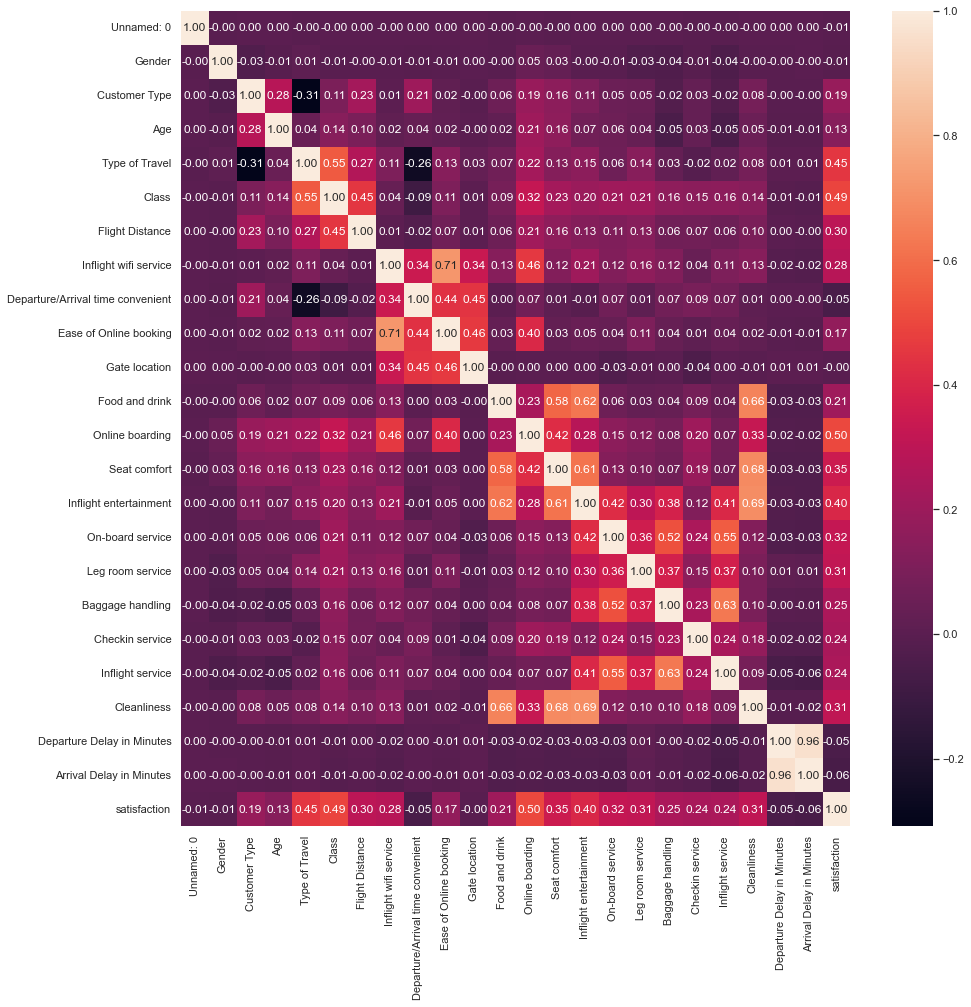

In [13]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')


In [14]:
def histPlots(df):
    for i in df.columns:
        plt.hist(df[str(i)], bins=10)
        plt.xlim(xmin=df[str(i)].min(), xmax = df[str(i)].max())
        plt.title(str(i))
        plt.show()

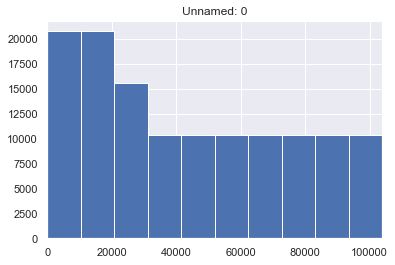

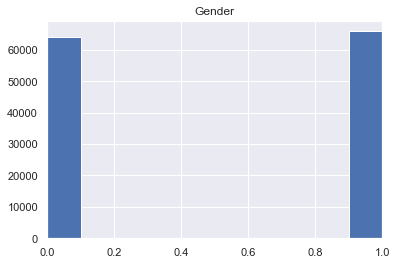

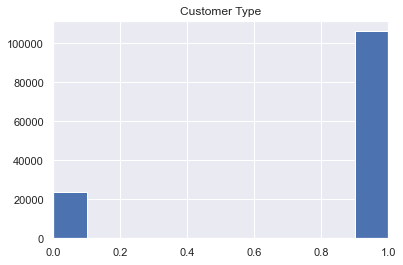

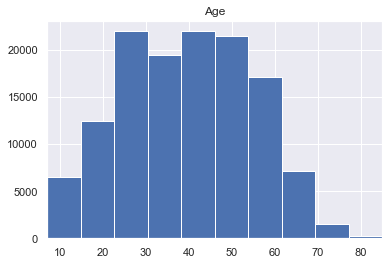

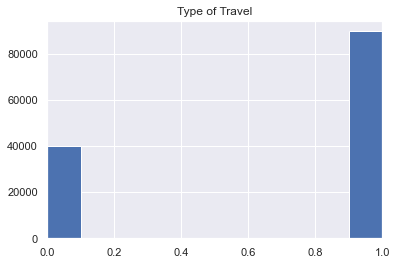

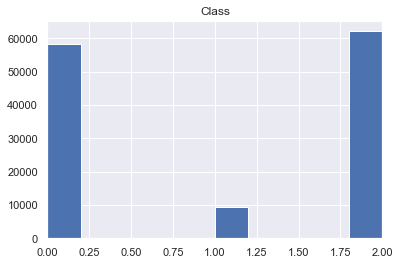

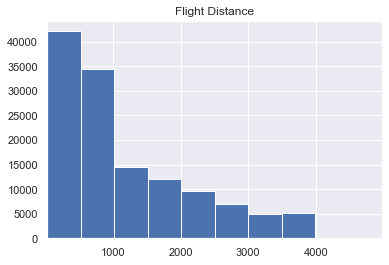

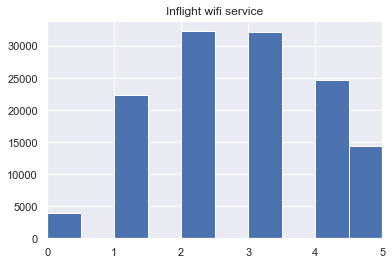

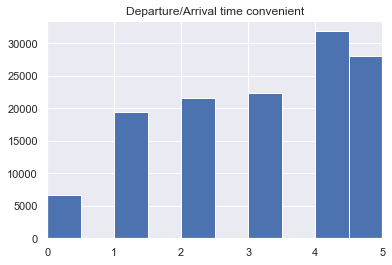

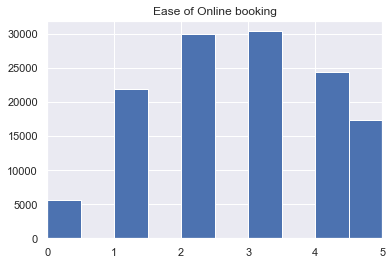

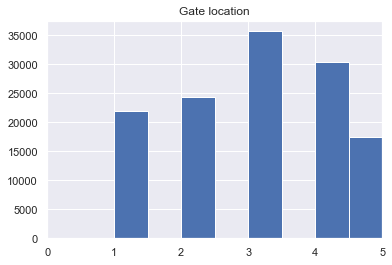

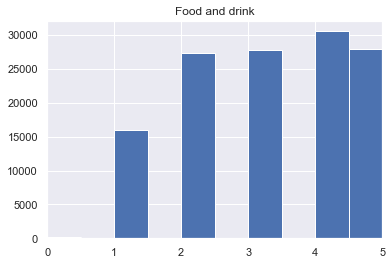

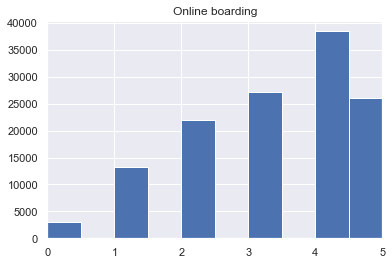

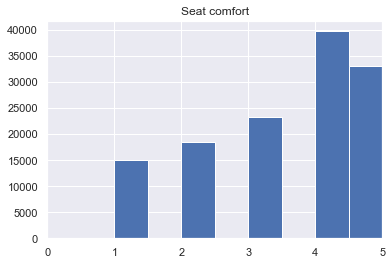

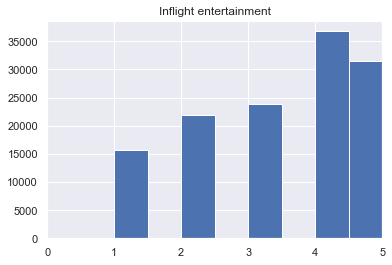

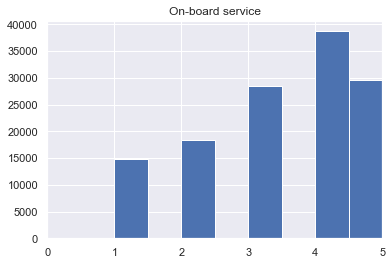

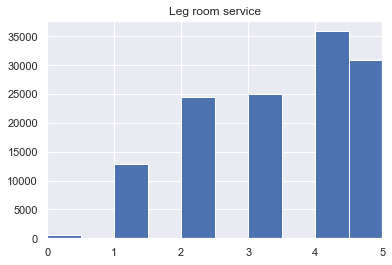

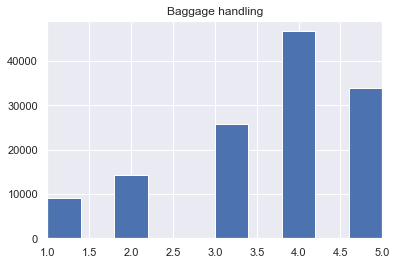

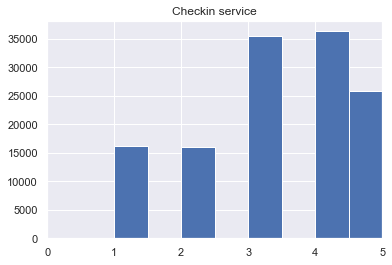

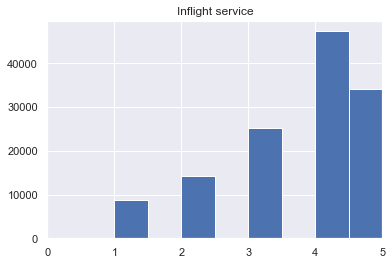

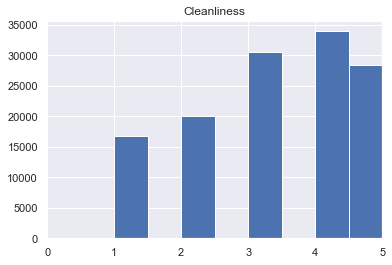

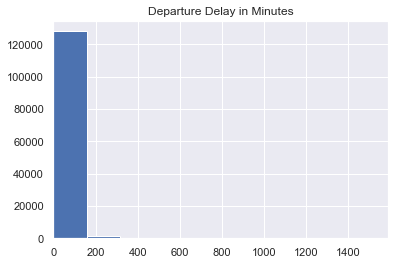

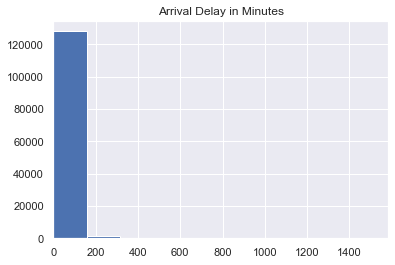

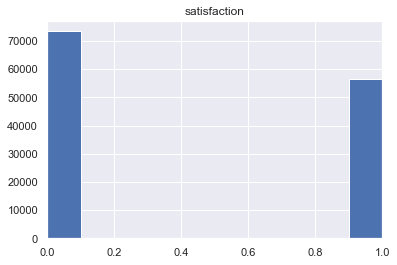

In [15]:
histPlots(data)

#### Outliers

In [16]:
def dropOutliers(df, columns, q=0.93):
    for i in columns:
        val = df[i].quantile(q)
        changedData = df[df[i] < val]
        df = changedData
    return df

In [17]:
dataWO_outliers = dropOutliers(data, ['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], q=0.90)

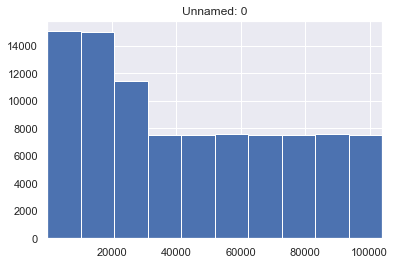

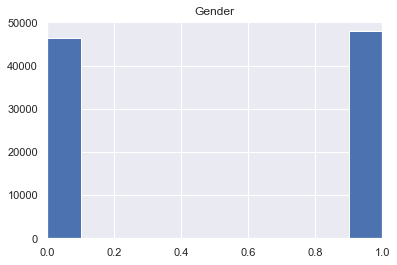

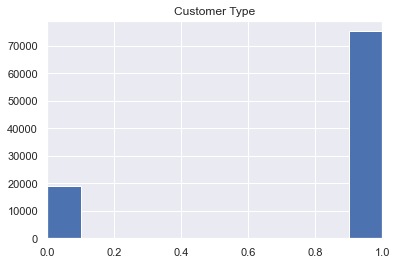

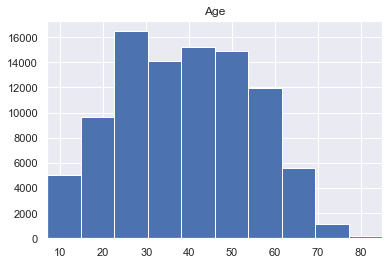

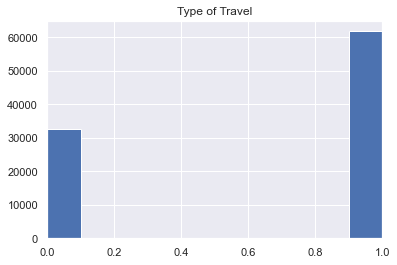

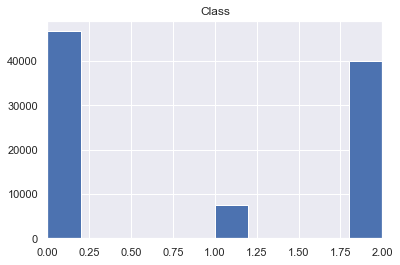

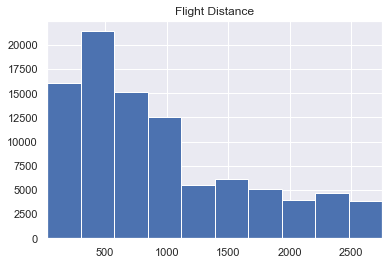

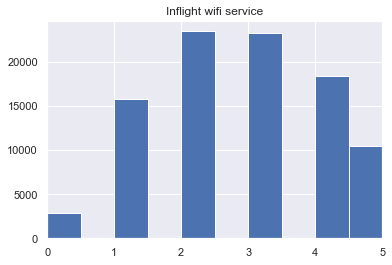

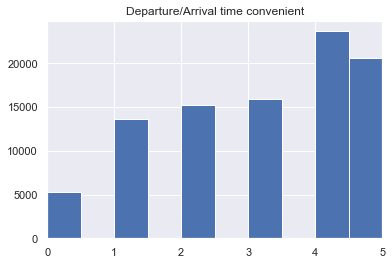

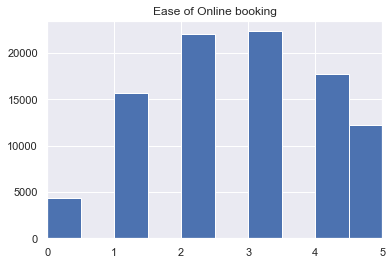

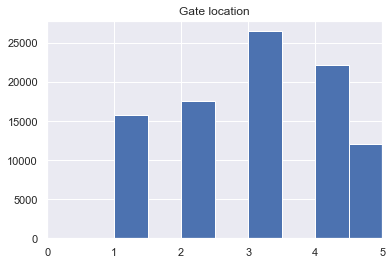

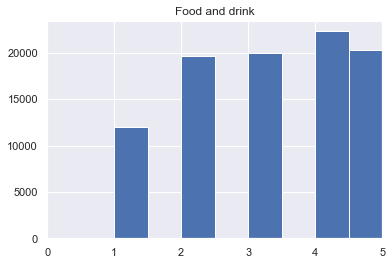

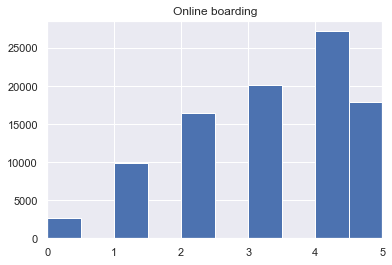

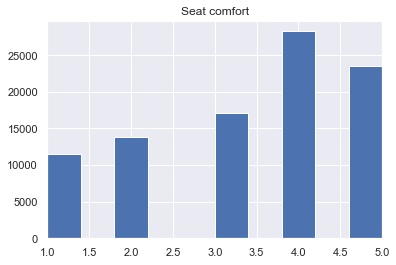

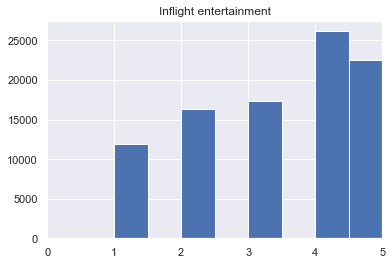

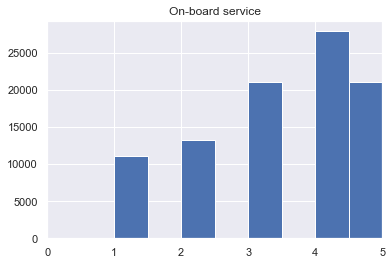

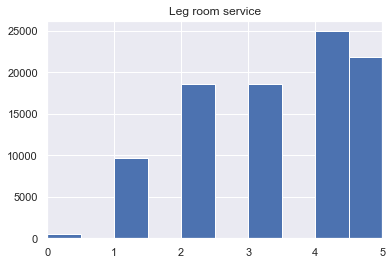

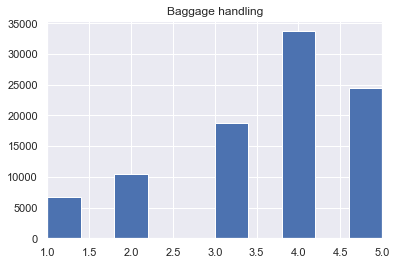

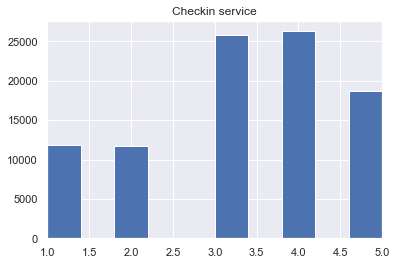

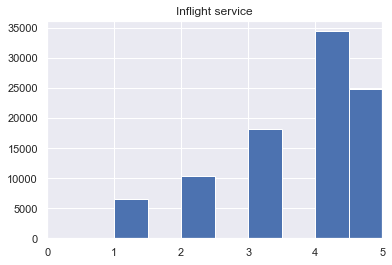

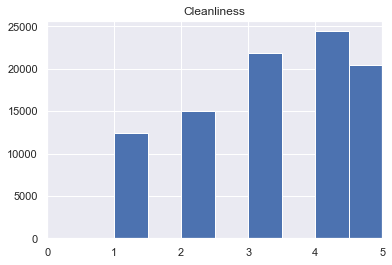

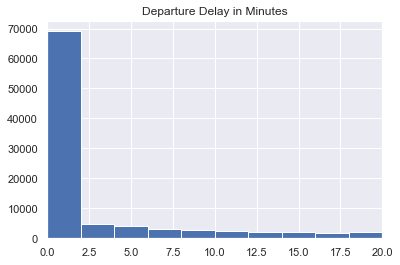

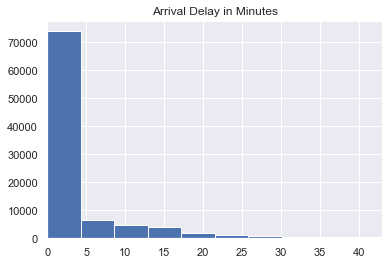

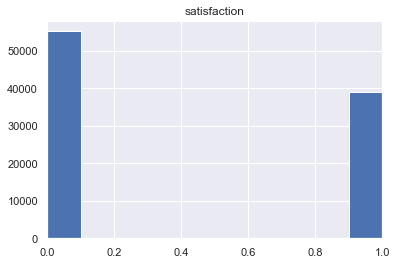

In [18]:
histPlots(dataWO_outliers)

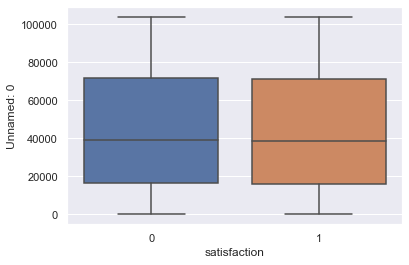

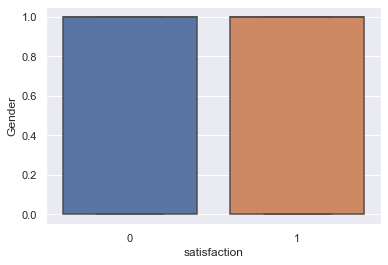

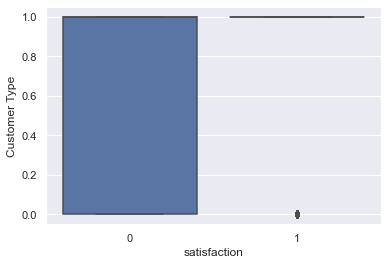

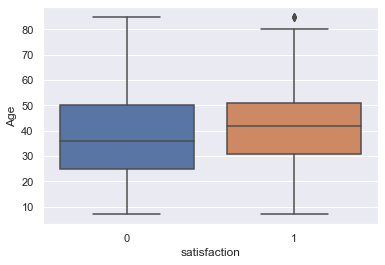

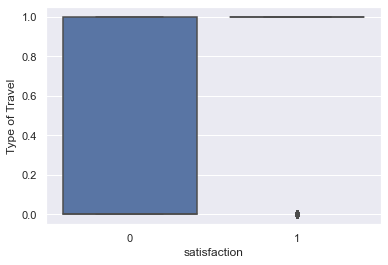

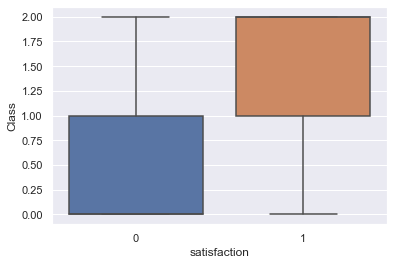

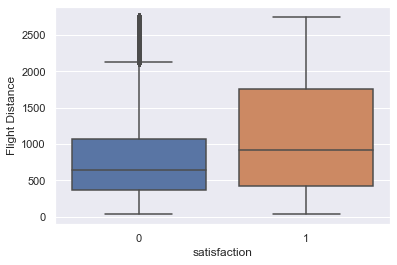

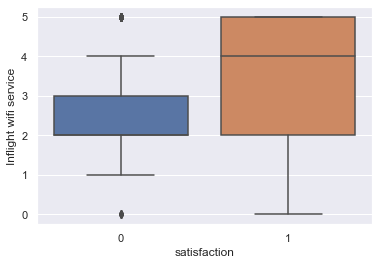

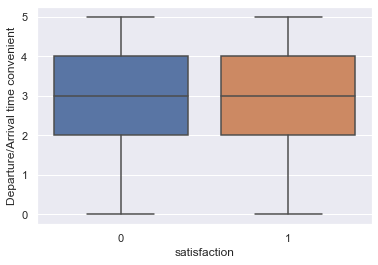

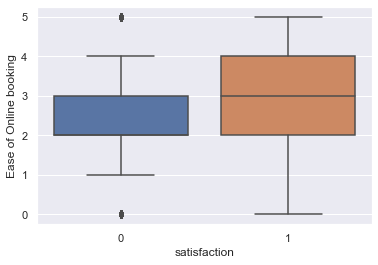

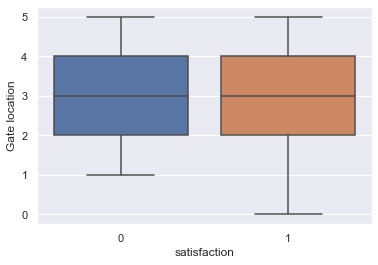

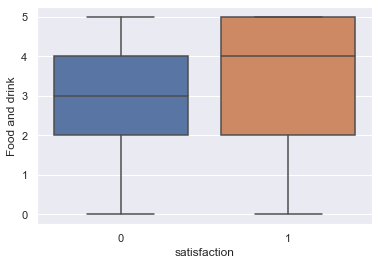

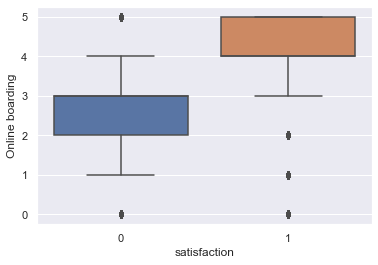

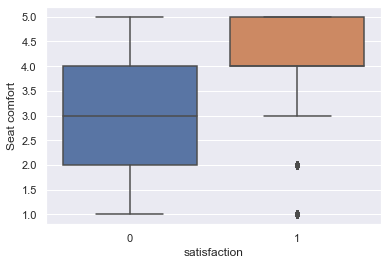

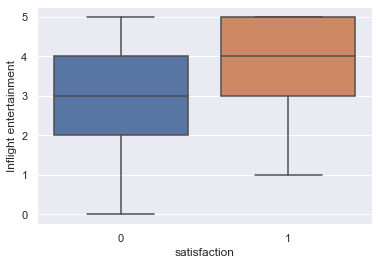

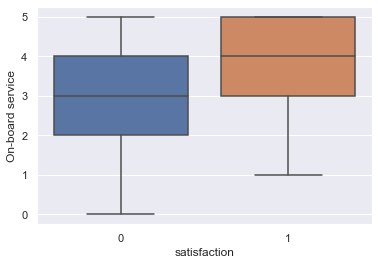

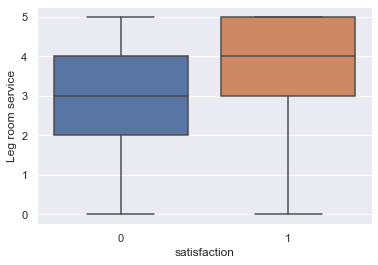

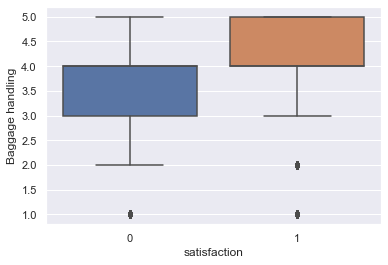

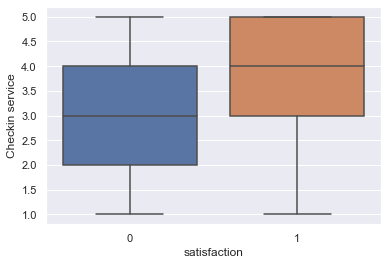

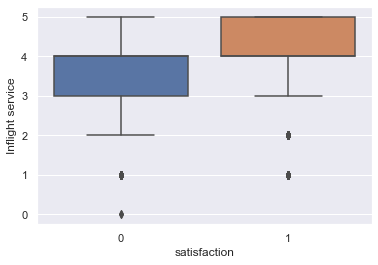

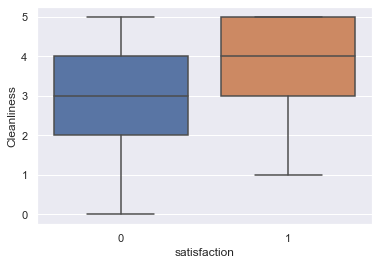

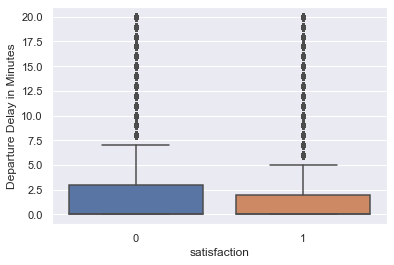

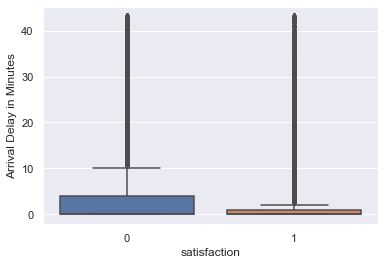

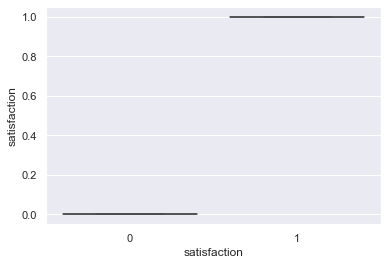

In [19]:
for i in dataWO_outliers.columns:
    plt.figure()
    sns.boxplot(y = dataWO_outliers[str(i)], x = dataWO_outliers['satisfaction'])


In [20]:
dataWO_outliers = dropOutliers(dataWO_outliers, ['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], q=0.95)

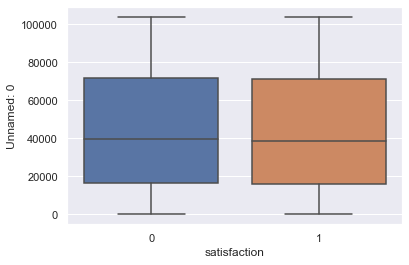

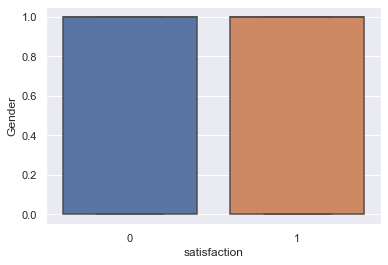

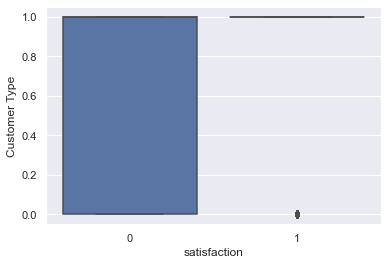

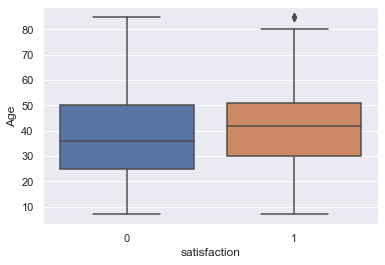

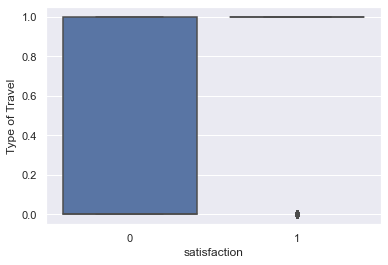

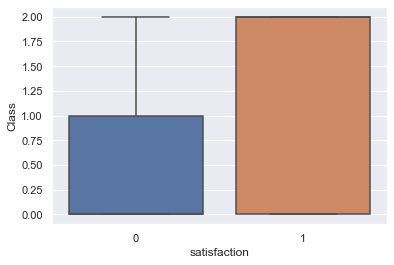

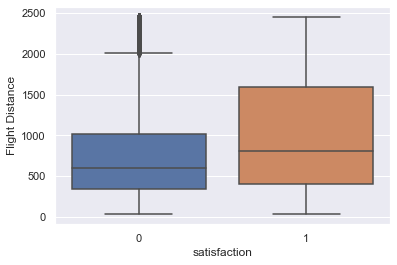

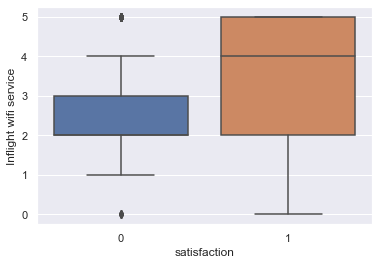

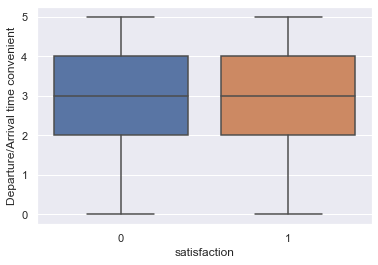

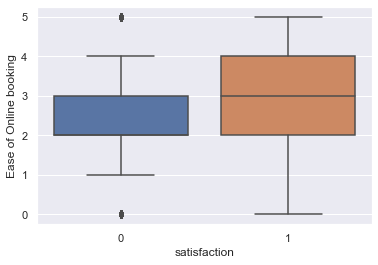

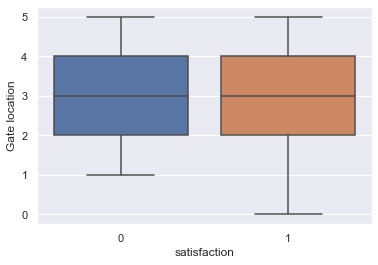

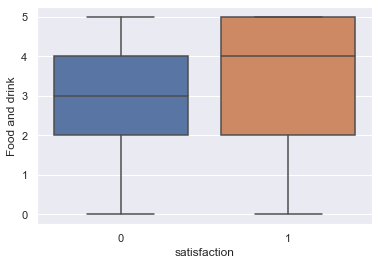

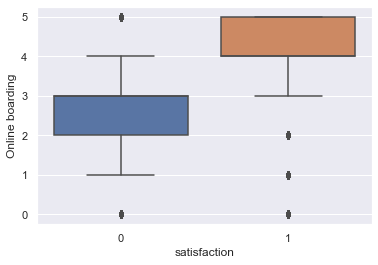

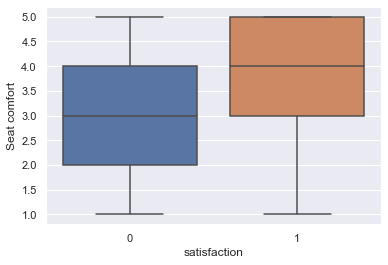

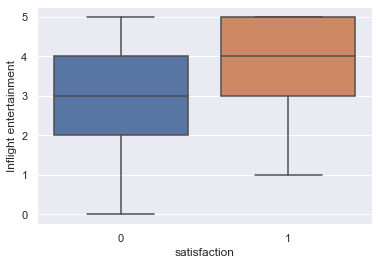

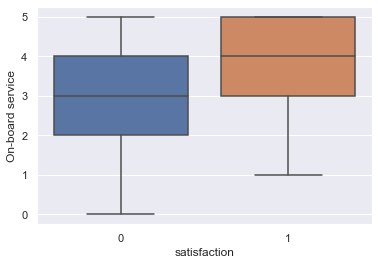

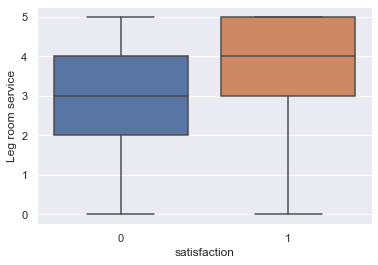

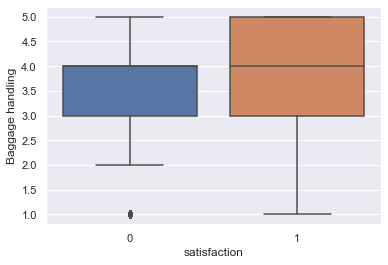

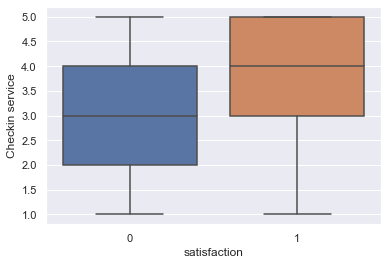

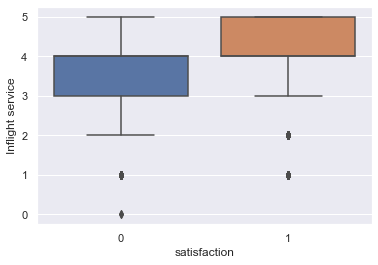

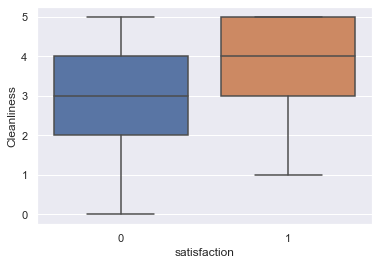

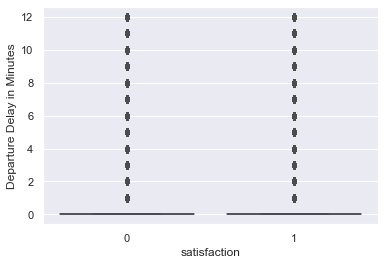

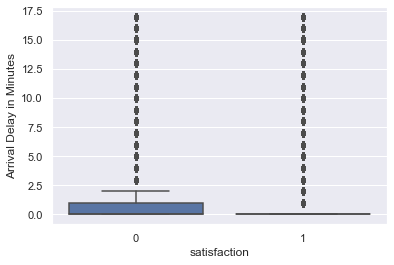

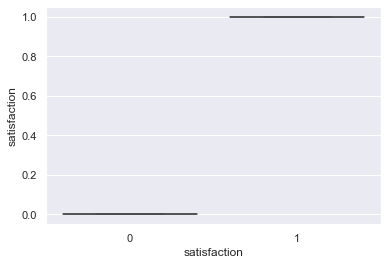

In [21]:
for i in dataWO_outliers.columns:
    plt.figure()
    sns.boxplot(y = dataWO_outliers[str(i)], x = dataWO_outliers['satisfaction'])


### Data Standartization

In [22]:
def standartization(input_data):
    return input_data.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

standart= standartization(dataWO_outliers.drop('satisfaction', axis=1))
standart.drop(columns=['Unnamed: 0'], inplace=True)
standart['satisfaction']=list(dataWO_outliers['satisfaction'])

In [23]:
standart

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,-1.016782,-1.942894,-0.903266,0.739912,1.158189,-1.006059,0.186930,-0.699075,0.185878,0.026466,...,-1.727615,-1.835878,1.279023,-0.523674,-1.820305,0.293404,-1.712852,-0.088196,1.234347,0
2,0.983483,0.514690,-0.838445,0.739912,1.158189,0.461535,-0.563255,-0.699075,-0.529116,-0.764290,...,1.244250,0.490878,-0.226918,0.316695,0.546514,0.293404,1.311602,-0.447545,-0.439472,1
3,0.983483,0.514690,-0.903266,0.739912,1.158189,-0.476949,-0.563255,1.244806,1.615866,1.607978,...,-0.984649,-1.060293,1.279023,-0.523674,-1.820305,0.293404,-0.956738,3.505303,2.071256,0
4,-1.016782,0.514690,1.430280,0.739912,1.158189,-1.040039,0.186930,-0.051115,0.185878,0.026466,...,-0.241682,-0.284707,0.526052,0.316695,-0.242426,-0.556240,-0.200625,-0.447545,-0.439472,1
5,0.983483,0.514690,-0.838445,-1.351494,-0.940682,0.523021,0.186930,0.596845,-0.529116,-1.555045,...,-1.727615,-0.284707,0.526052,0.316695,0.546514,0.293404,-1.712852,-0.447545,-0.439472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,-1.016782,-1.942894,-0.319879,0.739912,1.158189,-0.535200,0.186930,-0.051115,0.185878,-1.555045,...,0.501284,-0.284707,-0.979889,0.316695,0.546514,1.143048,0.555489,-0.447545,-0.439472,0
25972,-1.016782,0.514690,-1.032907,0.739912,1.158189,-0.341031,0.937115,0.596845,0.900872,0.817222,...,0.501284,0.490878,1.279023,1.157064,1.335454,1.143048,0.555489,-0.447545,-0.439472,1
25973,0.983483,0.514690,-1.421831,-1.351494,-0.940682,-0.046541,-0.563255,1.244806,-1.244110,1.607978,...,-0.984649,0.490878,-0.226918,0.316695,1.335454,0.293404,-0.956738,-0.447545,-0.439472,0
25974,-1.016782,0.514690,-1.616294,0.739912,1.158189,0.437263,0.186930,-0.051115,0.185878,0.026466,...,0.501284,-0.284707,-0.979889,1.157064,0.546514,1.143048,0.555489,-0.447545,-0.439472,1


### PCA

In [24]:
X = standart.drop('satisfaction', axis=1)
y = standart['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents , columns = ['feature_1', 'feature_2'])
principalDf

,feature_1,feature_2
0,3.026885,-1.551344
1,-2.589251,1.960755
2,1.437793,-2.276736
3,-1.225337,0.010125
4,2.933962,-1.391396
...,...,...
79769,-0.973198,0.875305
79770,-2.713130,-1.445103
79771,2.090992,-1.093574
79772,-1.642943,0.072333


<AxesSubplot:>

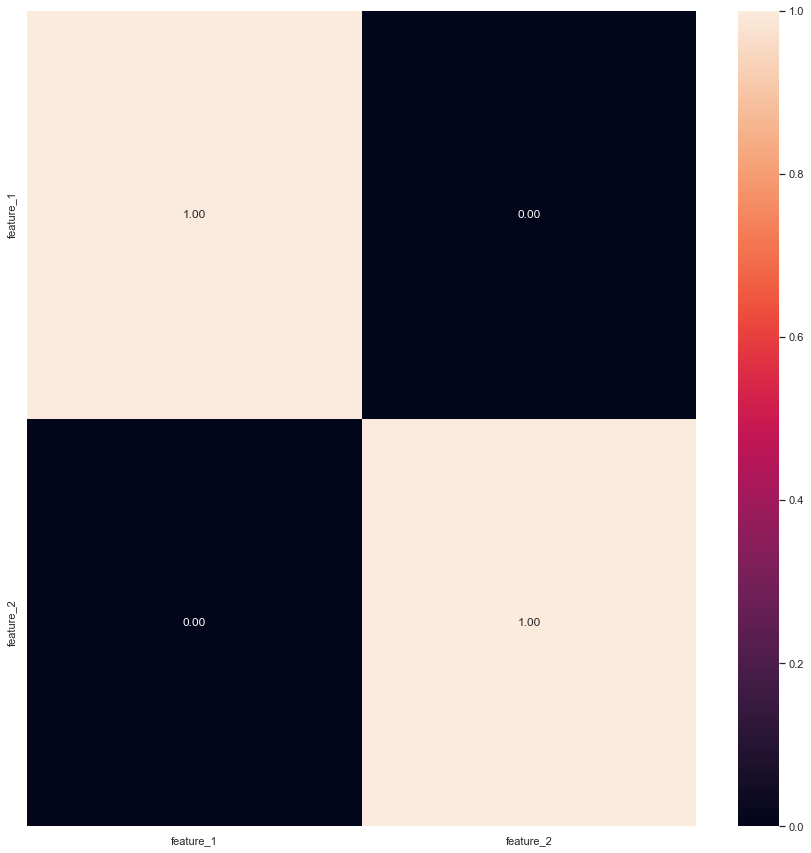

In [33]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(principalDf.corr(), annot=True, fmt='.2f')

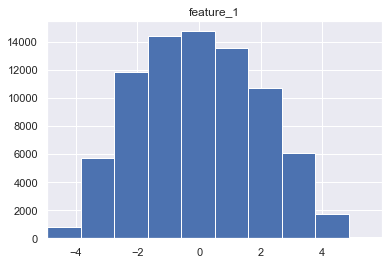

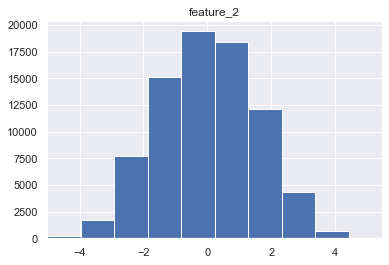

In [34]:
histPlots(principalDf)

In [188]:
kmeans = KMeans(3)
kmeans.fit(principalDf)
principalDf['labels'] = kmeans.predict(principalDf)

In [190]:
principalDf

,feature_1,feature_2,satisfaction,labels
0,3.026885,-1.551344,0,0
1,-2.589251,1.960755,1,2
2,1.437793,-2.276736,0,0
3,-1.225337,0.010125,1,1
4,2.933962,-1.391396,0,0
...,...,...,...,...
79769,-0.973198,0.875305,0,2
79770,-2.713130,-1.445103,1,1
79771,2.090992,-1.093574,0,0
79772,-1.642943,0.072333,1,1


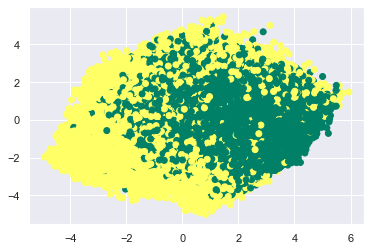

In [201]:
plt.scatter(principalDf['feature_1'], principalDf['feature_2'], c = principalDf['satisfaction'], cmap='summer')

In [49]:
principalDf['satisfaction'] = list(standart['satisfaction'])
principalDf

,feature_1,feature_2,satisfaction
0,3.026885,-1.551344,0
1,-2.589251,1.960755,1
2,1.437793,-2.276736,0
3,-1.225337,0.010125,1
4,2.933962,-1.391396,0
...,...,...,...
79769,-0.973198,0.875305,0
79770,-2.713130,-1.445103,1
79771,2.090992,-1.093574,0
79772,-1.642943,0.072333,1


<AxesSubplot:xlabel='satisfaction', ylabel='feature_1'>

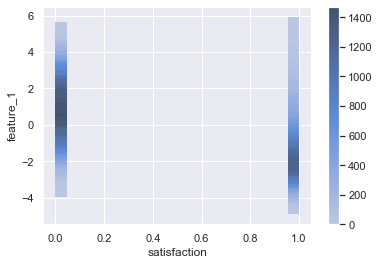

In [55]:
sns.histplot(principalDf, x="satisfaction", y="feature_1",  cbar=True,)

<AxesSubplot:xlabel='satisfaction', ylabel='feature_2'>

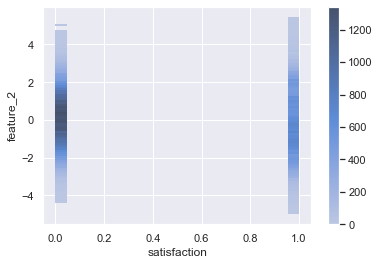

In [56]:
sns.histplot(principalDf, x="satisfaction", y="feature_2",  cbar=True,)

<AxesSubplot:xlabel='satisfaction', ylabel='feature_2'>

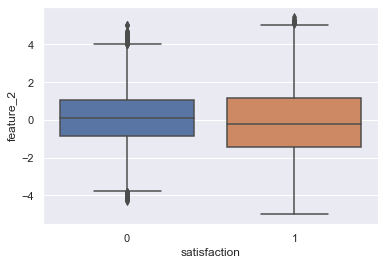

In [58]:
sns.boxplot(y = principalDf['feature_2'], x = principalDf['satisfaction'])

<AxesSubplot:xlabel='satisfaction', ylabel='feature_1'>

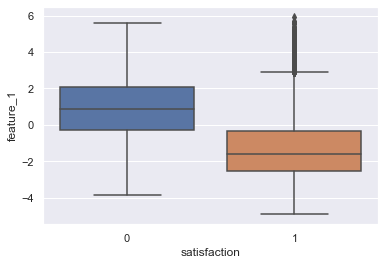

In [63]:
sns.boxplot(y = principalDf['feature_1'], x = principalDf['satisfaction'])

### TSNE

In [30]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)


In [31]:
tsnelDf = pd.DataFrame(data = X_embedded , columns = ['feature_1', 'feature_2'])
tsnelDf

,feature_1,feature_2
0,-45.398258,10.605106
1,-5.244489,-32.676647
2,6.835541,-6.602932
3,17.817543,-17.794006
4,13.258307,44.529453
...,...,...
79769,-37.964573,-19.961302
79770,30.990580,-24.140747
79771,8.194866,42.597275
79772,24.329924,-22.155121


<AxesSubplot:>

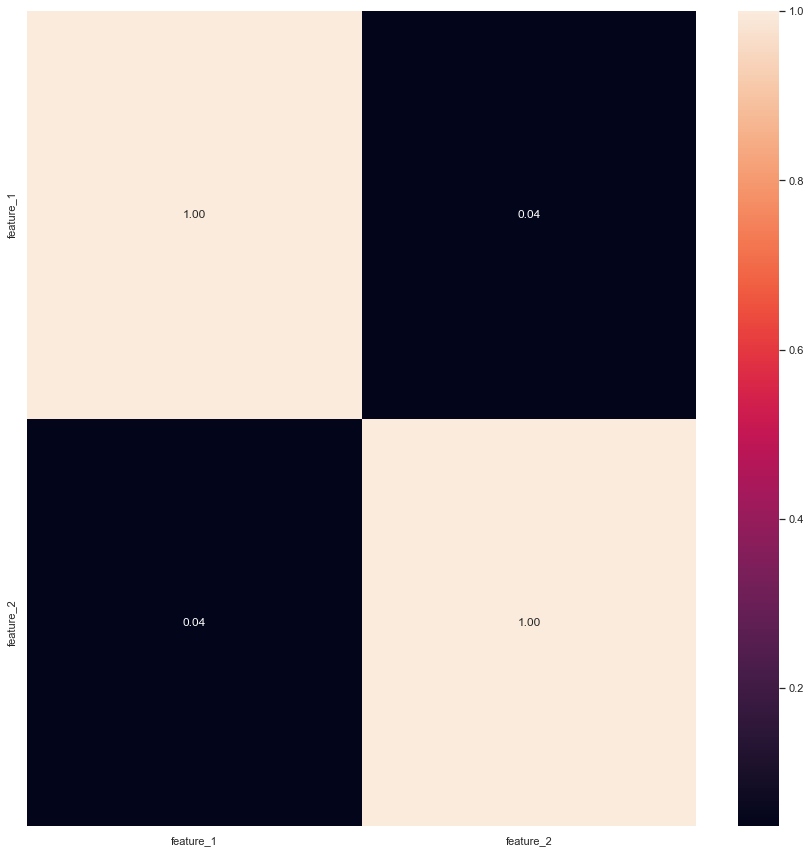

In [35]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(tsnelDf.corr(), annot=True, fmt='.2f')

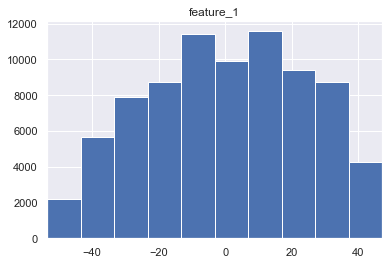

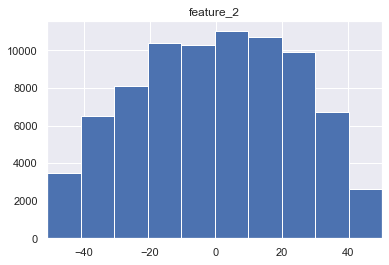

In [36]:
histPlots(tsnelDf)

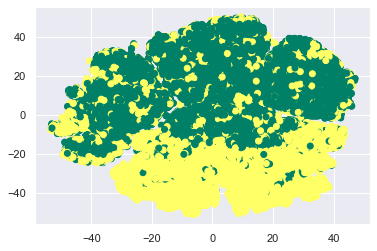

In [200]:
plt.scatter(tsnelDf['feature_1'], tsnelDf['feature_2'], c = tsnelDf['satisfaction'], cmap='summer')

In [59]:
tsnelDf['satisfaction'] = list(standart['satisfaction'])
tsnelDf

,feature_1,feature_2,satisfaction
0,-45.398258,10.605106,0
1,-5.244489,-32.676647,1
2,6.835541,-6.602932,0
3,17.817543,-17.794006,1
4,13.258307,44.529453,0
...,...,...,...
79769,-37.964573,-19.961302,0
79770,30.990580,-24.140747,1
79771,8.194866,42.597275,0
79772,24.329924,-22.155121,1


<AxesSubplot:xlabel='satisfaction', ylabel='feature_1'>

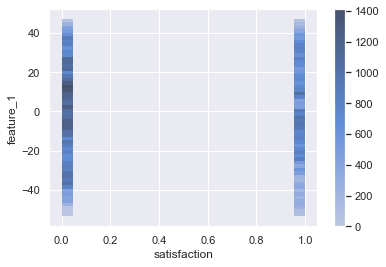

In [60]:
sns.histplot(tsnelDf, x="satisfaction", y="feature_1",  cbar=True,)

<AxesSubplot:xlabel='satisfaction', ylabel='feature_1'>

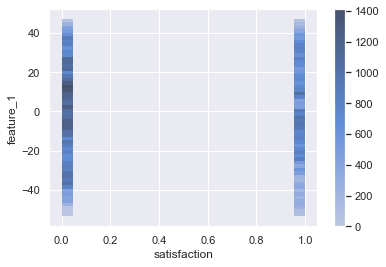

In [61]:
sns.histplot(tsnelDf, x="satisfaction", y="feature_1",  cbar=True,)

<AxesSubplot:xlabel='satisfaction', ylabel='feature_1'>

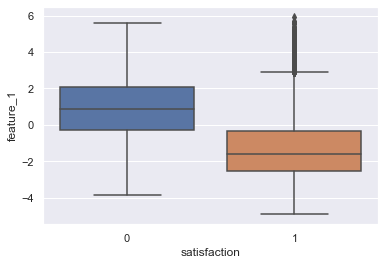

In [64]:
sns.boxplot(y = principalDf['feature_1'], x = principalDf['satisfaction'])

<AxesSubplot:xlabel='satisfaction', ylabel='feature_2'>

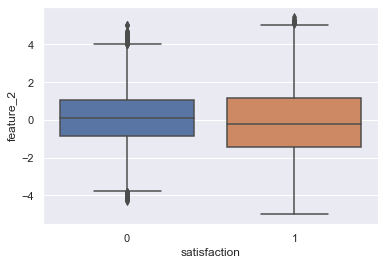

In [65]:
sns.boxplot(y = principalDf['feature_2'], x = principalDf['satisfaction'])

### 2

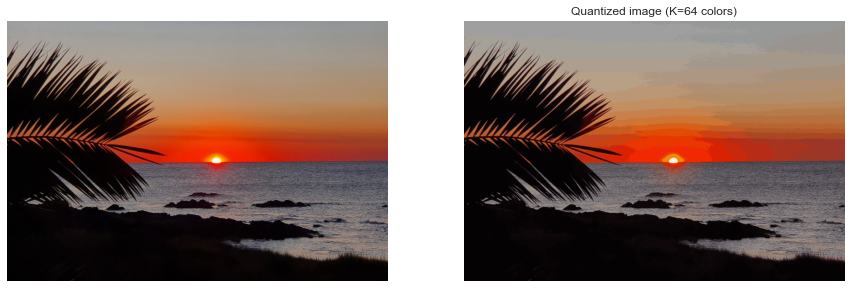

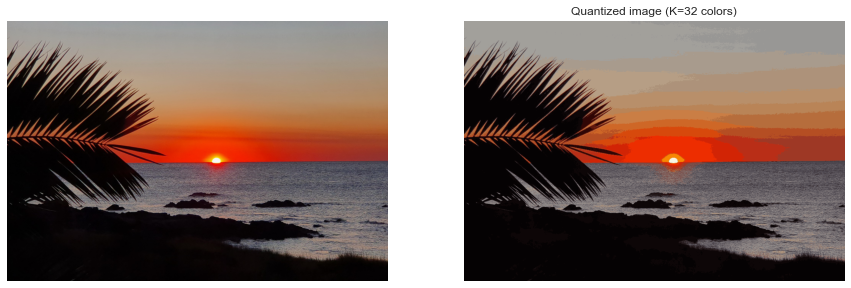

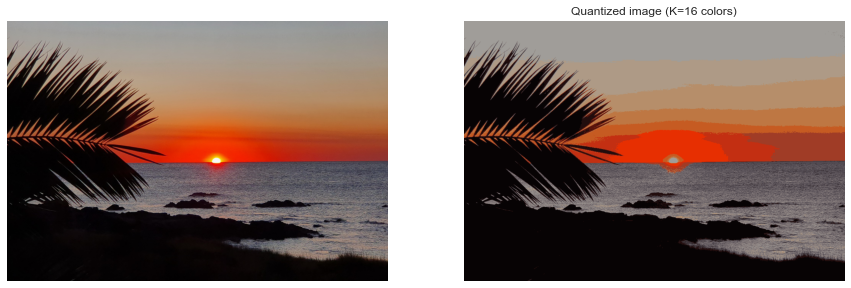

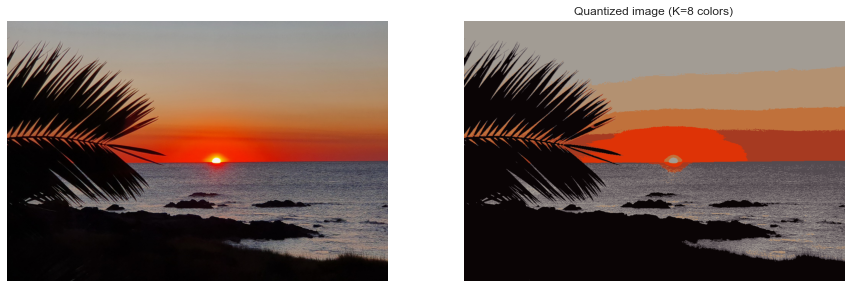

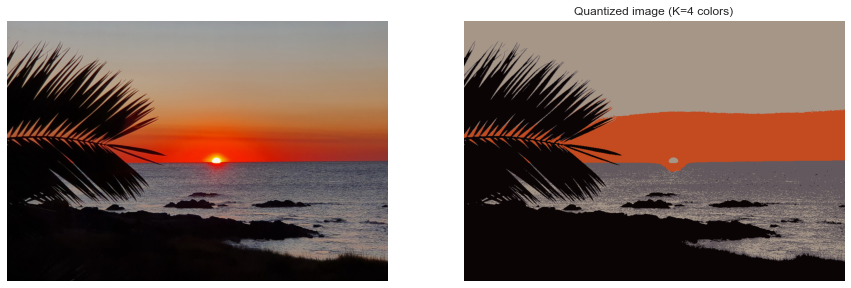

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

colors = 32
imgOrig = io.imread('sunset.jpg')
imgArray = np.reshape(imgOrig, (-1, 3))
# normalize (0, 1)
imgArray = imgArray / 255
imgArrayTrain = shuffle(imgArray, random_state=0)[:10000]
for i in [64, 32, 16, 8, 4]:
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', n_init=15).fit(imgArrayTrain)
    labels = kmeans.predict(imgArray)
    centers = kmeans.cluster_centers_
    img = np.reshape(centers[labels], img.shape)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    ax1.axis('off')
    ax1.imshow(imgOrig)
    ax2.axis('off')
    ax2.set_title(f'Quantized image (K={i} colors)')
    ax2.imshow(img)
    plt.show()

### 3

Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 
Текстові дані для аналізу можна обирати тут:

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
import pandas as pd 

data = pd.read_csv('Emotion_final.csv')
dataUpd = data[(data['Emotion'] == 'sadness') | (data['Emotion'] == 'love') | (data['Emotion'] == 'happy')]

In [168]:
dataUpd

,Text,Emotion,class
0,didnt feel humiliated,sadness,0
1,go feeling hopeless damned hopeful around some...,sadness,0
3,ever feeling nostalgic fireplace know still pr...,love,1
5,ive feeling little burdened lately wasnt sure,sadness,0
8,petronas years feel petronas performed well ma...,happy,2
...,...,...,...
20731,tears came rapidly dissolved angry expression ...,sadness,0
20732,swell tears ruth stared incredulously bundle f...,sadness,0
20733,glanced linoleum despai,sadness,0
20734,perhaps despair made believe one person world ...,sadness,0


In [97]:
dataUpd.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [98]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('English')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [109]:
import string 
dataUpd['Text'] = dataUpd['Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
dataUpd['Text'] = dataUpd['Text'].str.replace('[{}]'.format(string.punctuation), '')


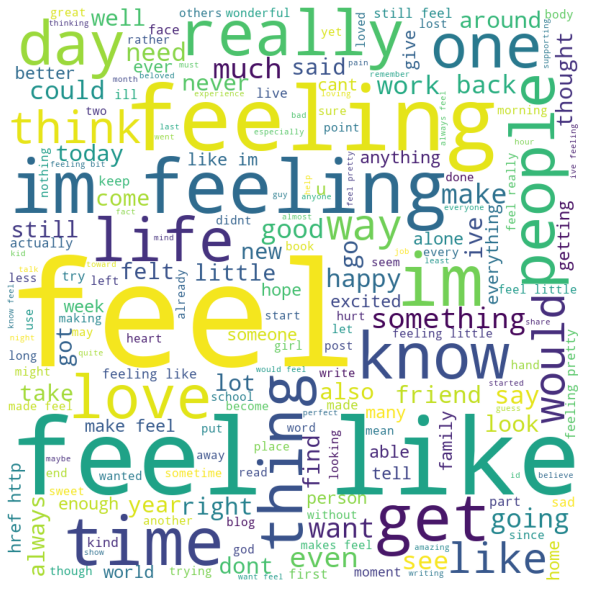

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
comment_words = ''
for val in dataUpd.Text:
    val = str(val)

    tokens = val.split()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop),
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [116]:
from collections import defaultdict

In [117]:
def generate_N_grams(text,ngram=2):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [118]:
def plotNGrams(nameClass, n=3):
    x = defaultdict(int)
    for text in dataUpd[dataUpd['Emotion'] == nameClass]['Text']:
        for word in generate_N_grams(text, n):
            x[word]+=1
    df_positive=pd.DataFrame(sorted(x.items(),key=lambda x:x[1],reverse=True))
    pd1=df_positive[0][:10]
    pd2=df_positive[1][:10]
    plt.figure(1,figsize=(16,4))
    plt.bar(pd1,pd2, color ='pink',
            width = 0.4)
    plt.xlabel("Words in positive dataframe")
    plt.ylabel("Count")
    plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
    plt.savefig("positive-unigram.png")
    plt.show()

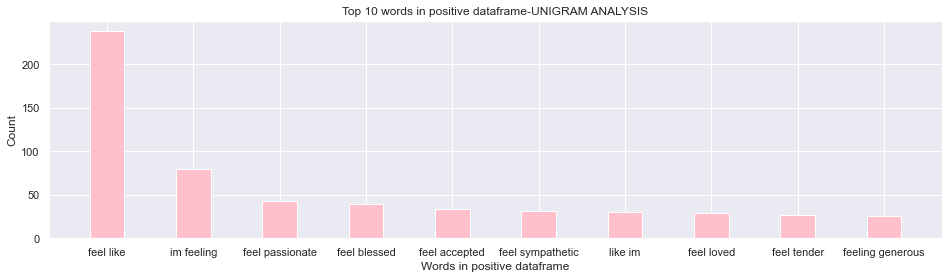

In [119]:
plotNGrams('love', n=2)

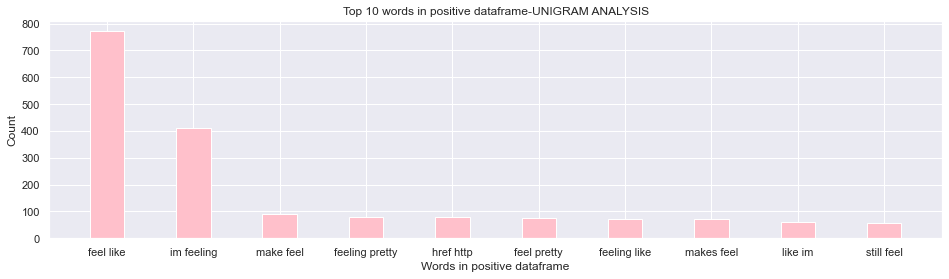

In [120]:
plotNGrams('happy', n=2)

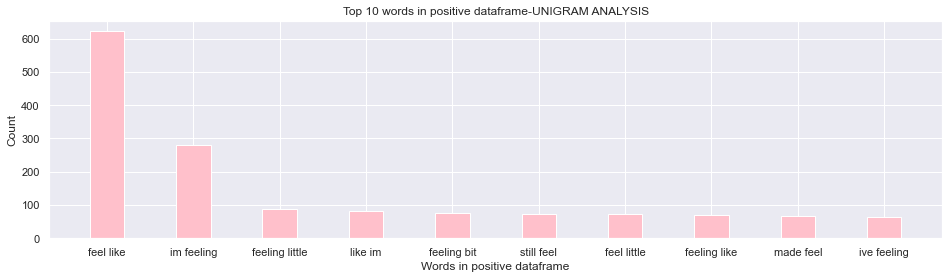

In [121]:
plotNGrams('sadness', n=2)

In [122]:
dataUpd['class'] = dataUpd['Emotion'] 


In [123]:
dataUpd['class'].replace({'sadness':0, 'love':1, 'happy': 2}, inplace=True)

#### model

In [124]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataUpd, test_size = 0.3, random_state = 42)

In [129]:
X_train= train['Text']
y_train = train['class']

X_test = test['Text']
y_test = test['class']

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [133]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [165]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
test_tfidf = tfidf.transform(test['Text'])

rf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None)
rf.fit(X_train_tfidf, y_train)


print(rf.score(X_test_tfidf, y_test))
predictions = rf.predict(X_test_tfidf)
print(confusion_matrix(y_test, predictions))


0.923231421557688
[[1841   12   65]
 [  10  358  130]
 [  68   59 1938]]


In [167]:
print(classification_report(y_test, predictions,))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1918
           1       0.83      0.72      0.77       498
           2       0.91      0.94      0.92      2065

    accuracy                           0.92      4481
   macro avg       0.90      0.87      0.89      4481
weighted avg       0.92      0.92      0.92      4481

